IMPORT PACKAGES

In [ ]:
# Run on first call, then comment it.
# !pip install -q git+https://github.com/THU-MIG/yolov10.git
# !pip install -q supervision

In [ ]:
# Run on first call, then comment it.
# !wget https://github.com/moured/YOLOv10-Document-Layout-Analysis/releases/download/doclaynet_weights/yolov10x_best.pt

In [1]:
import cv2
import supervision as sv # pip install supervision
from ultralytics import YOLOv10
import fitz
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
os.getpid()

1089027

CONFIGURATION

In [3]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

IMPORT MODEL

In [4]:
model = YOLOv10('yolov10x_best.pt').to(device)

HELPER FUNCTION

In [5]:
def plot(image, results):
    detections = sv.Detections.from_ultralytics(results)

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = bounding_box_annotator.annotate(scene = image, detections = detections)
    annotated_image = label_annotator.annotate(scene = annotated_image, detections = detections)

    sv.plot_image(annotated_image)

CRAWL PDFS - EUNSEON CHOI

In [6]:
# TODO.

EXTRACT IMAGES

In [7]:
for i, filename in enumerate(tqdm(os.listdir('./data/pdf_raw'))):
    doc = fitz.open(f'./data/pdf_raw/{filename}')
    doc.save(f'./data/pdf_numbered/{i:05d}.pdf')
    for j, page in enumerate(doc):
        img = page.get_pixmap()
        img.pil_save(f'./data/pdf_png/{i:05d}_{j:05d}.png')

100%|██████████| 10/10 [00:05<00:00,  2.00it/s]


In [ ]:
for filename in tqdm(os.listdir('./data/pdf_png')):
    image = cv2.imread(f'./data/pdf_png/{filename}')
    results = model(source = f'./data/pdf_png/{filename}', conf = 0.2, iou = 0.8, verbose = False)[0]
    plot(image, results)

In [9]:
# TODO: Filter out the detected images. - https://docs.ultralytics.com/

IMPLEMENT OCR | ASK TO CHATGPT - SUNYOUNG PARK

In [10]:
# TODO.

FILTER ARCHITECTURE-RELATED FIGURES - DONGJAE KIM

In [11]:
# TODO.

SUPPLMENET MODEL DESCRIPTION

In [12]:
# TODO.

In [13]:
results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Caption', 1: 'Footnote', 2: 'Formula', 3: 'List-item', 4: 'Page-footer', 5: 'Page-header', 6: 'Picture', 7: 'Section-header', 8: 'Table', 9: 'Text', 10: 'Title'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

In [14]:
results.orig_img.shape

(792, 612, 3)

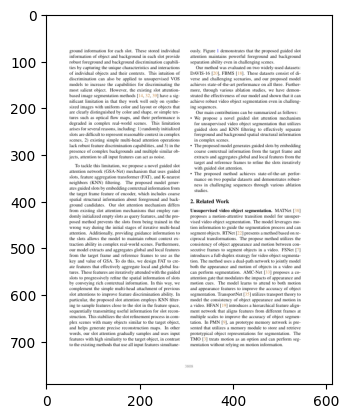

In [15]:
plt.imshow(results.orig_img)

In [16]:
results.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([9., 9., 9., 9., 3., 3., 3., 9., 7., 4., 9.], device='cuda:1')
conf: tensor([0.9904, 0.9893, 0.9873, 0.9871, 0.9814, 0.9785, 0.9744, 0.9736, 0.8853, 0.8474, 0.8126], device='cuda:1')
data: tensor([[ 48.6431,  74.9650, 286.9842, 311.4724,   0.9904,   9.0000],
        [307.8587, 415.2968, 544.8838, 714.0643,   0.9893,   9.0000],
        [ 48.7486, 320.8892, 287.2249, 713.4432,   0.9873,   9.0000],
        [308.0226, 111.2896, 544.8229, 204.7900,   0.9871,   9.0000],
        [307.3904, 277.1883, 545.9892, 335.6694,   0.9814,   3.0000],
        [307.7148, 218.0517, 545.7563, 276.1064,   0.9785,   3.0000],
        [307.4696, 336.8712, 545.3260, 383.6013,   0.9744,   3.0000],
        [308.0774,  74.7949, 545.0368, 108.6051,   0.9736,   9.0000],
        [307.7728, 395.1549, 390.8775, 408.4308,   0.8853,   7.0000],
        [296.1172, 749.0085, 314.0378, 759.0294,   0.8474,   4.0000],
        [319.6987, 206.8051, 537.5996, 21